In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
#from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config

In [2]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [3]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/SinLogHighNoise/


In [4]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    print(f)
    if "Diff100_MSEs" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_13_true_drift.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_21_drift_est.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_1_drift_est.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_14_true_drift.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_13_true_paths.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_14_true_paths.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_16_true_paths.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_17_true_drift.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_16_true_drift.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_16_drift_est.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_17_true_paths.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_23_true_paths.npy
Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_1_true_paths.npy
Ridge_fSinLog_Dri

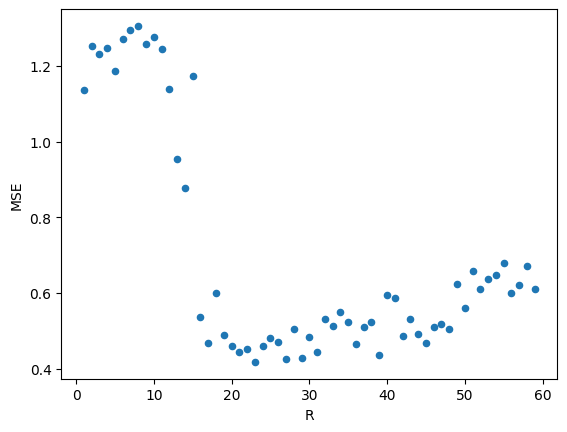

In [5]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [6]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
1      1.136285
2      1.252359
3      1.232757
4      1.247034
5      1.187485
6      1.271302
7      1.295026
8      1.305713
9      1.257499
10     1.276623
11     1.243946
12     1.138469
13     0.953298
14     0.878638
15     1.172226
16     0.536933
17     0.468904
18     0.600135
19     0.489412
20     0.459832
21     0.445560
22     0.452543
23     0.418140
24     0.458906
25     0.481538
26     0.469646
27     0.425190
28     0.505755
29     0.429766
30     0.483339
31     0.444821
32     0.532374
33     0.513633
34     0.549677
35     0.522644
36     0.464165
37     0.510784
38     0.524664
39     0.437583
40     0.594876
41     0.587899
42     0.487831
43     0.531347
44     0.490878
45     0.468267
46     0.511054
47     0.519261
48     0.505490
49     0.624492
50     0.559462
51     0.658942
52     0.609687
53     0.637664
54     0.648562
55     0.680569
56     0.601259
57     0.621966
58     0.671247
59     0.609964


0    0.41814
Name: 23,

In [7]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Ridge_f{diradd.replace('HighNoise', '')}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT_Diff{config.diffusion:.1f}".replace(".", "")
print(save_path)
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/SinLogHighNoise/Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff100


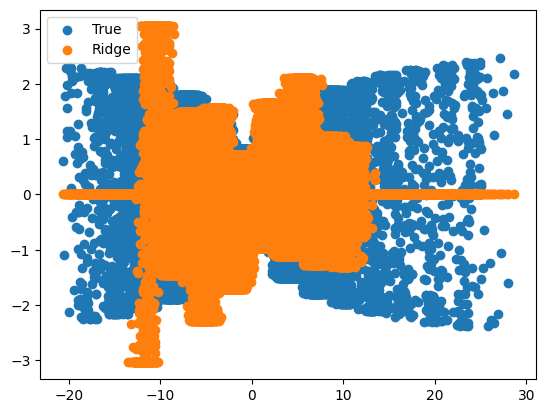

In [8]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Ridge")
plt.legend()
plt.show()